# **ALGUNAS REGRESIONES CON PYTHON**

## **Producción de acero**

Con el fin de analizar el consumo energético de una empresa
productora de acero se inspeccionaron durante cinco días cada una de
las tres líneas de producción. En cada una de ellas se anotaron las
variables más relevantes para las distintas horas del turno, salvo en la
última hora donde sólo se inspeccionó durante cuatro días. En total se
disponen de 117 mediciones recogidas en las siguientes variables:
- **consumo** Consumo energético de la empresa (Megavatios·hora).
- **ProdTotal** Producción total de acero (Toneladas de acero).
- **pr.tbc** Producción del tren de bandas calientes (Toneladas de acero).
- **pr.cc** Producción de colada continua (Toneladas de acero).
- **pr.ca** Producción del convertidor de acero (Toneladas de acero).
- **pr.galv1** Producción de galvanizado de tipo I (Tns. de acero).
- **pr.galv2** Producción de galvanizado de tipo II (Tns. de acero).
- **pr.pint** Producción de chapa pintada (Tns. de acero).
- **linea** Línea de producción empleada (A, B o C).
- **hora** Hora en la que se recogieron los datos (1ª, 2ª,. . . , 8ª).
- **temperatura** Temperatura del sistema: alta (Alta), media (Media) y baja (Baja).
- **averias** Presencia de averías (Sí, No).
- **naverias** Número de averías detectadas.
- **sistema** Activación de un sistema de detección de sobrecalentamiento: encendido (ON), apagado (OFF).

**Asignación:** Analice la relación lineal o no lineal entre las variables independientes: pr.galv1, pr.galv2, pr.pint y el consumo

### **a.** Evalúe con pruebas de hipótesis si hay correlación lineal, previa evaluación de la normalidad del consumo, con cada una de ellas.

0.5992987155914307 consumo Sigue una distribución normal


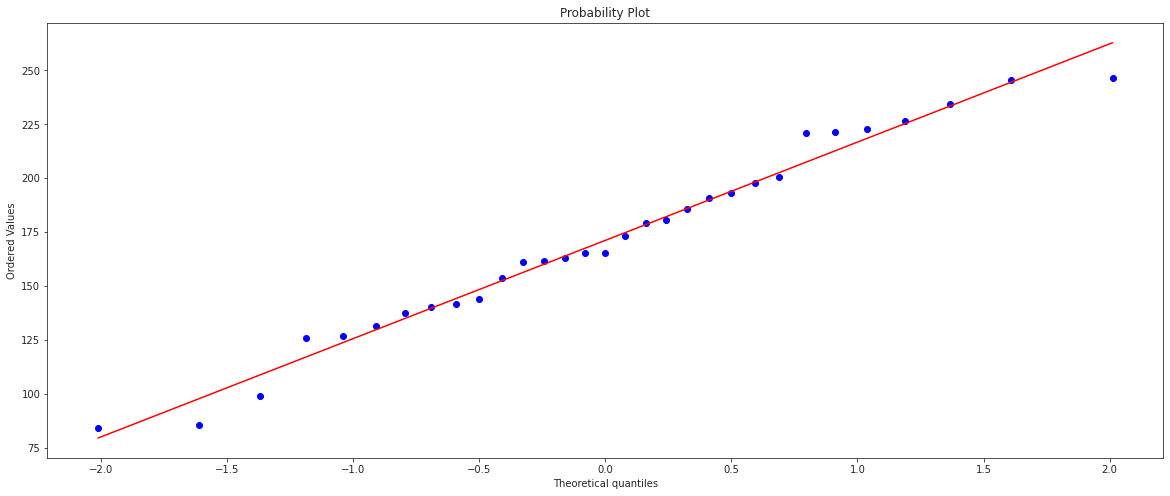

/home/alejandro/python/RegresionTaller/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='consumo', ylabel='Density'>

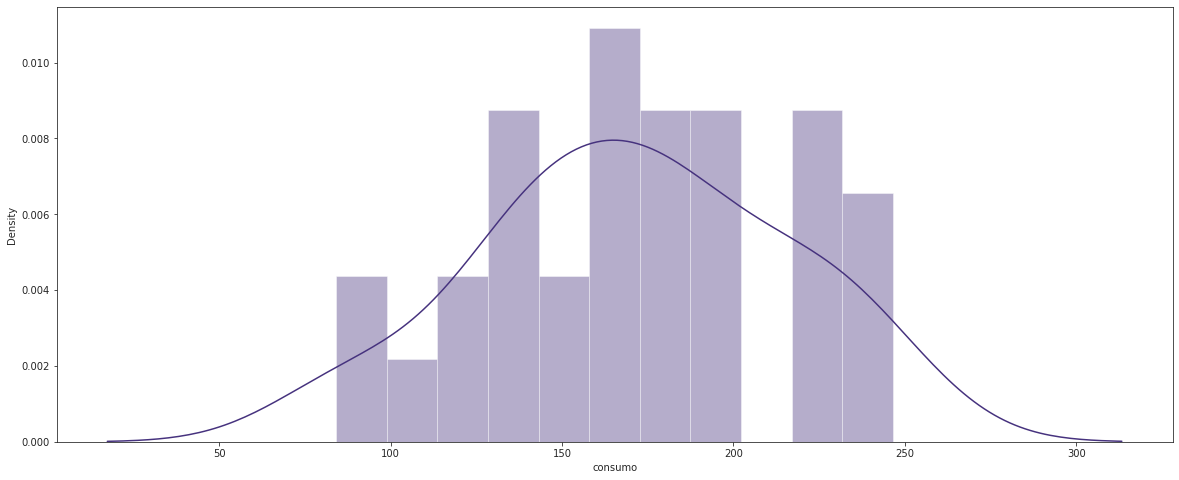

In [2]:
# Importamos los módulos necesarios
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import scipy.stats as stats


sns.set_theme(context=None, style='ticks', palette='viridis', font='sans-serif', font_scale=10, color_codes=True, rc = {'figure.figsize':(20,8)})

# Creamos el DataFrame a partir del archivo csv
data = pd.read_csv("acero.csv", sep=",", decimal=",")

# Filtramos los datos, no interesan los ceros en las variables independientes
ceros = data[data["pr.galv1"]==0].index
data = data.drop(ceros)
ceros = data[data["pr.galv2"]==0].index
data = data.drop(ceros)
ceros = data[data["pr.pint"]==0].index
data = data.drop(ceros)


# Prueba de Normalidad Shapiro-Wilk para consumo
# H0: SI ES NORMAL
consumo = data.iloc[:, 0]
dir(scipy.stats)
from scipy.stats import shapiro
stat, p = shapiro(consumo)
if p > 0.05:
    print(p, "consumo Sigue una distribución normal")
elif p <=0.05:
    print(p, "consumo No sigue una distribución normal")

# Visualizamos la normalidad de las variables independientes a tráves de un QQplot e histogramas
stats.probplot(data["consumo"],dist="norm",plot=plt)
plt.show()
sns.distplot(data["consumo"], bins=11)


Se probó graficamente por medio del histograma de frecuencia y una qqplot que no hay evidencias de no normalidad en la varialbe respuesta "consumo" por lo que se probará la correlación de las variables con Pearson.

In [3]:
a = data.iloc[:,[0,4]]
b = data.iloc[:,[0,5]]
c = data.iloc[:,[0,6]]

print("Coeficientes de corelación de Pearson: ")
print(a.corr(),"\n")
print(b.corr(),"\n")
print(c.corr(),"\n")

#Prueba de Hipotesis corelación
r, p = stats.pearsonr(a.iloc[:,1], a.iloc[:,0])
if p < 0.05:
    print(p, "Si hay corelación Lineal entre consumo y pr.galv1")
elif p > 0.05:
    print(p, "No hay corelación Lineal entre consumo y pr.galv1")

r, p = stats.pearsonr(b.iloc[:,1], b.iloc[:,0])
if p < 0.05:
    print(p, "Si hay corelación Lineal entre consumo y pr.galv2")
elif p > 0.05:
    print(p, "No hay corelación Lineal entre consumo y pr.galv2")

r, p = stats.pearsonr(c.iloc[:,1], c.iloc[:,0])
if p < 0.05:
    print(p, "Si hay corelación Lineal entre consumo y pr.pint")
elif p > 0.05:
    print(p, "No hay corelación Lineal entre consumo y pr.pint")

Coeficientes de corelación de Pearson: 
          consumo  pr.galv1
consumo   1.00000   0.28551
pr.galv1  0.28551   1.00000 

           consumo  pr.galv2
consumo   1.000000 -0.127121
pr.galv2 -0.127121  1.000000 

          consumo   pr.pint
consumo  1.000000 -0.112472
pr.pint -0.112472  1.000000 

0.11948523895168364 No hay corelación Lineal entre consumo y pr.galv1
0.49557560514799115 No hay corelación Lineal entre consumo y pr.galv2
0.5469079646702844 No hay corelación Lineal entre consumo y pr.pint


### **b.** Muestre los gráficos de dispersión y las regresiones lineales y verifique con la visualización de los residuales si estas regresiones lineales son consistentes.

pr.galv1 - consumo:


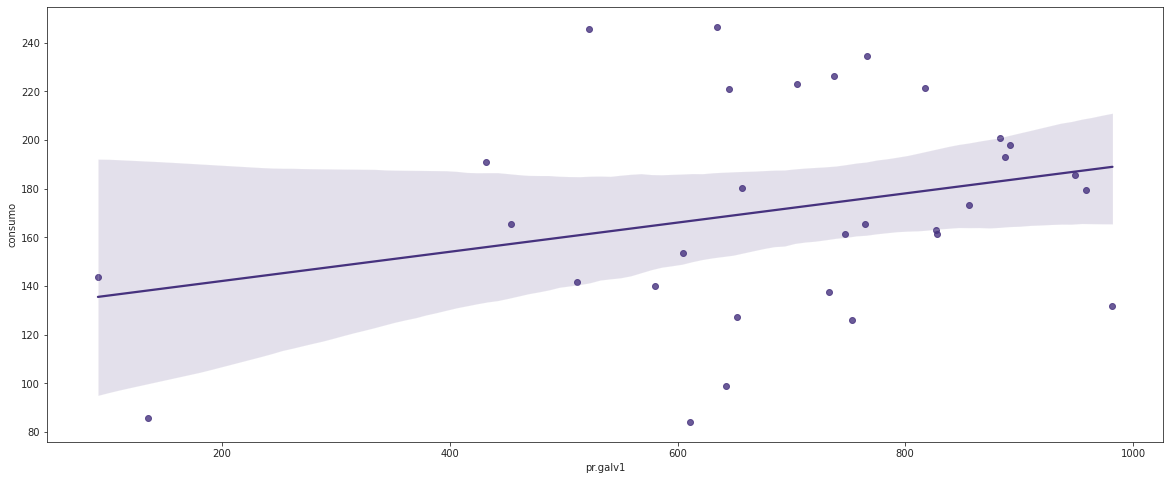

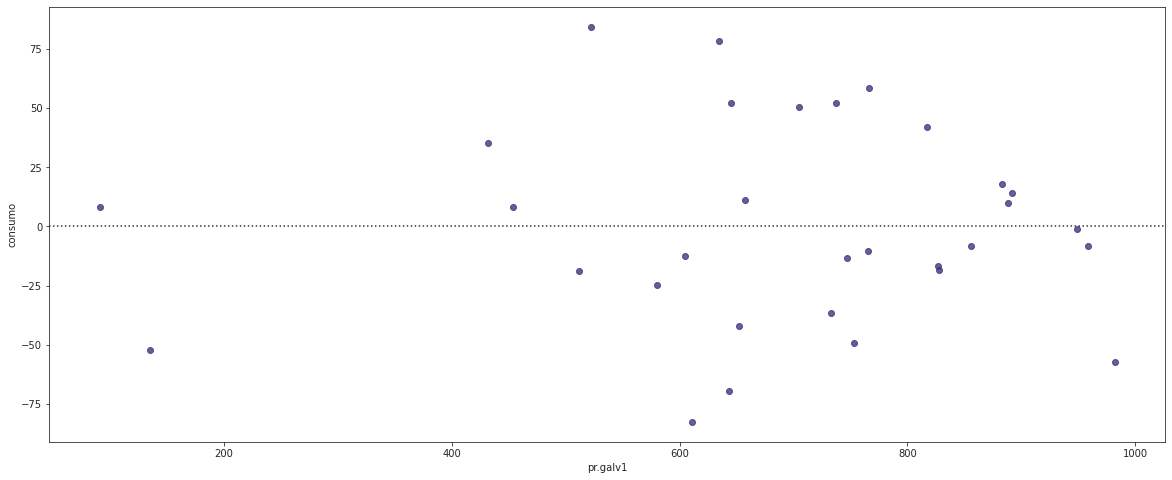

pr.galv2 - consumo:


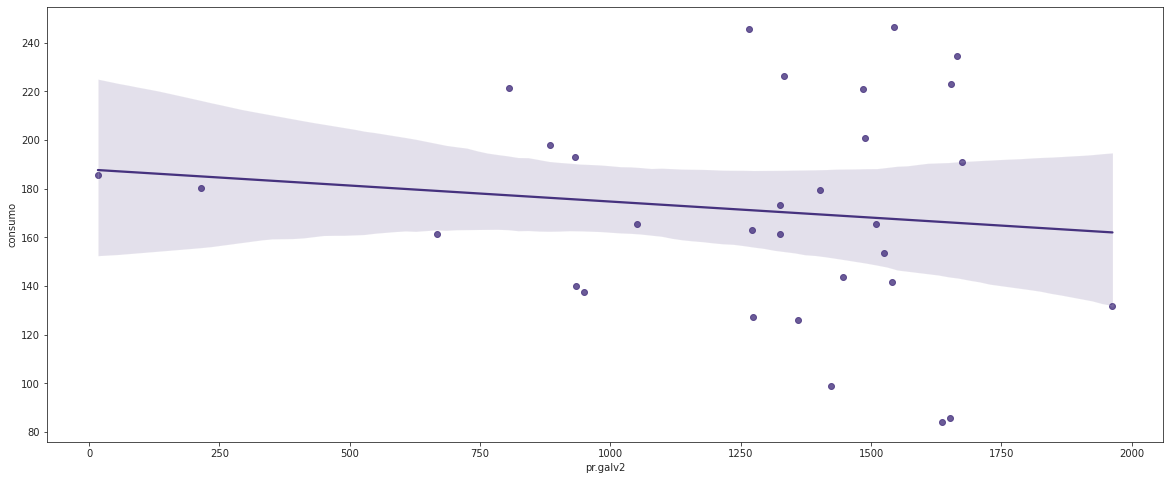

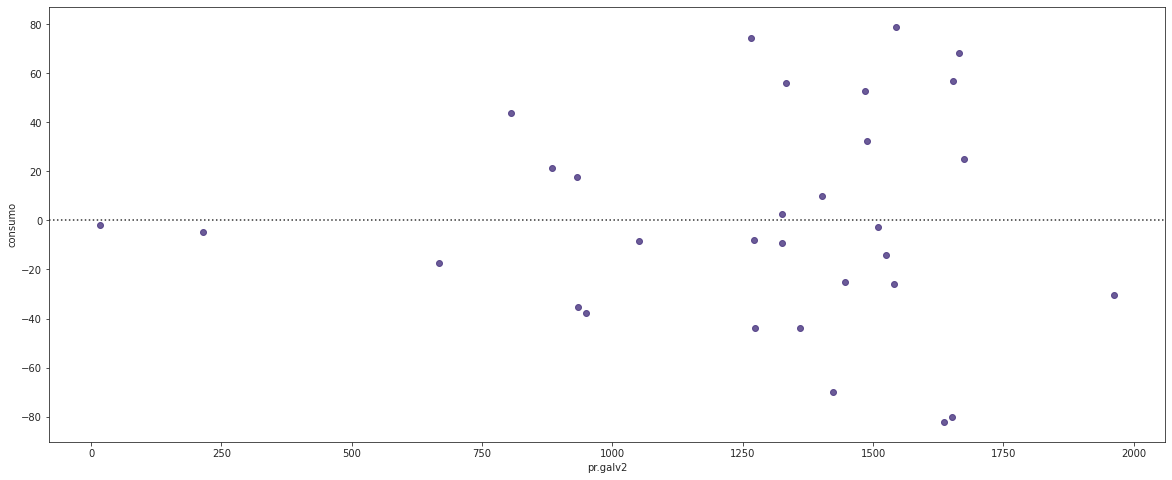

pr.pint - consumo:


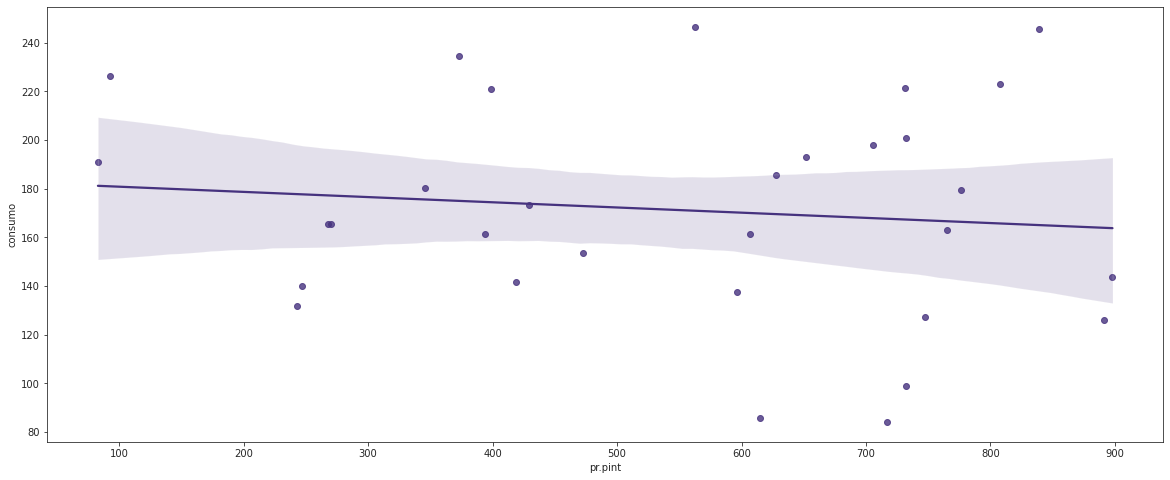

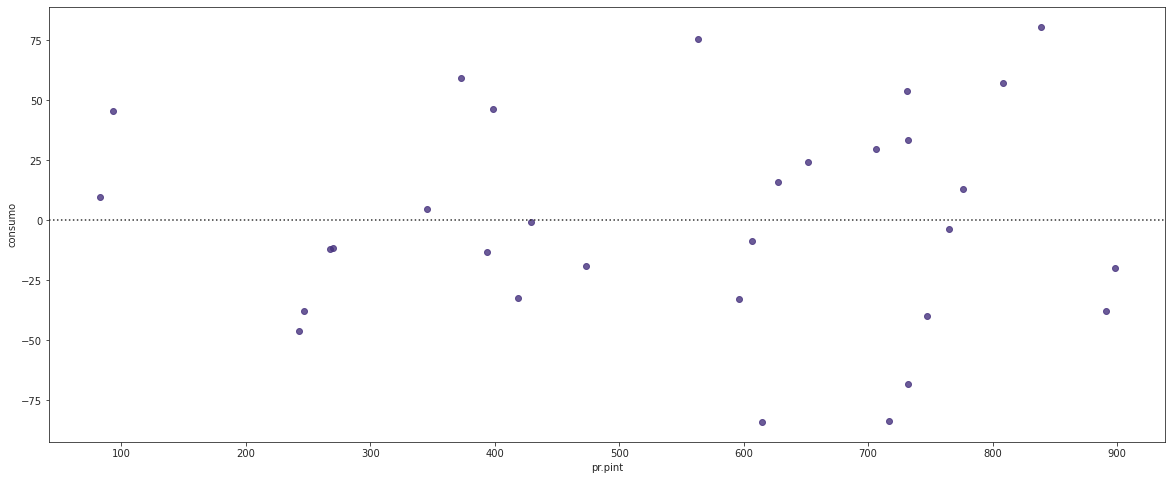

In [4]:
# Gráficos de regresiones lineales
print("pr.galv1 - consumo:")
sns.regplot(x="pr.galv1", y="consumo", data=a)
plt.show()
sns.residplot(x="pr.galv1", y="consumo", data=a)
plt.show()

print("pr.galv2 - consumo:")
sns.regplot(x="pr.galv2", y="consumo", data=b)
plt.show()
sns.residplot(x="pr.galv2", y="consumo", data=b)
plt.show()

print("pr.pint - consumo:")
sns.regplot(x="pr.pint", y="consumo", data=c)
plt.show()
sns.residplot(x="pr.pint", y="consumo", data=c)
plt.show()

### Se puede denotar también de forma gráfica que no existe relación lineal de cada variable independiente con la variable dependiente "consumo".

### **c.** Muestre los gráficos de las regresiones polinomiales de orden 2 (order=2), regresiones robustas (robust=True), y regresiones localizadas (lowes=True) y verifique con la visualización de los residuales si estas regresiones son consistentes.

----------REGRESIÓN DE ORDEN 2----------
pr.galv1 - consumo:


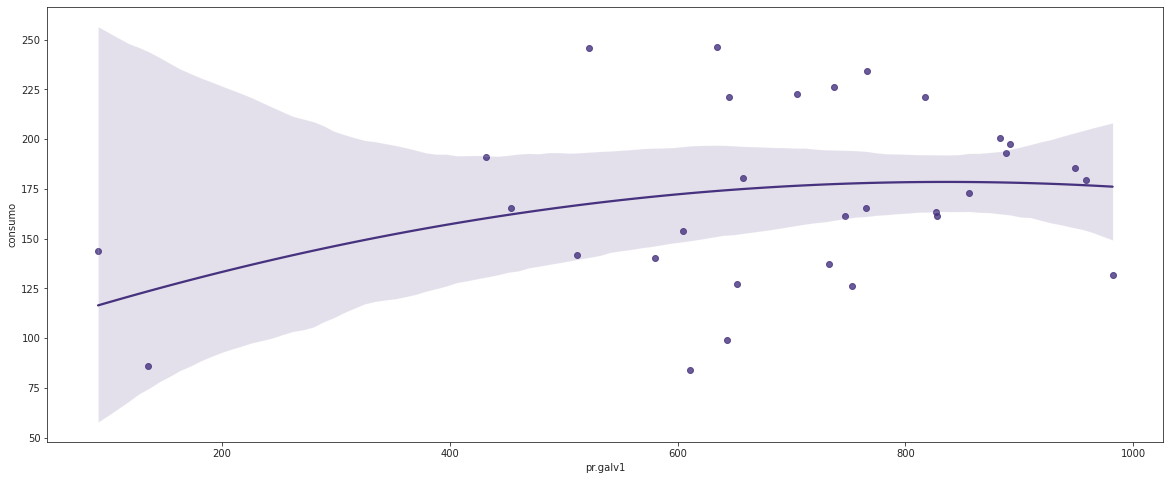

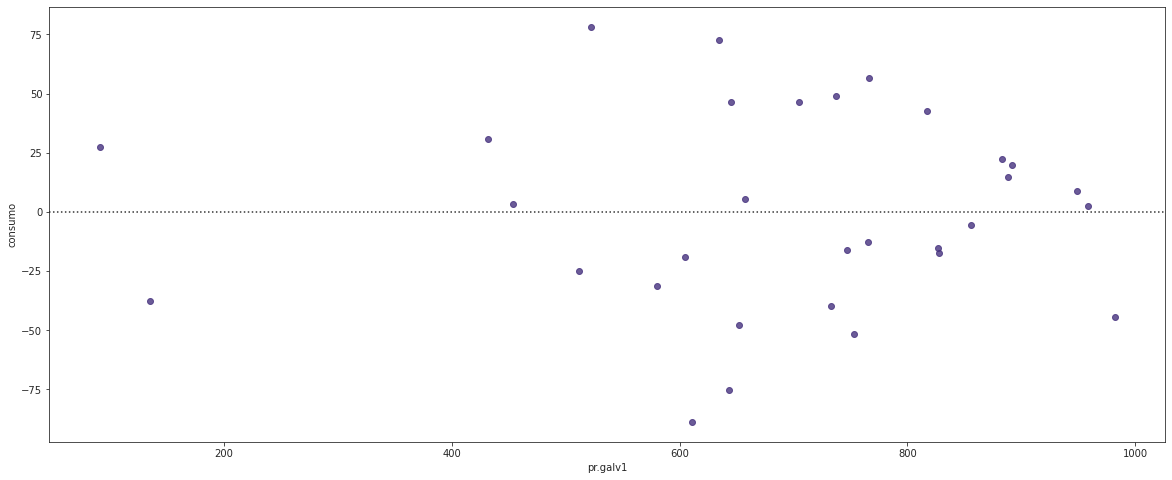

pr.galv2 - consumo:


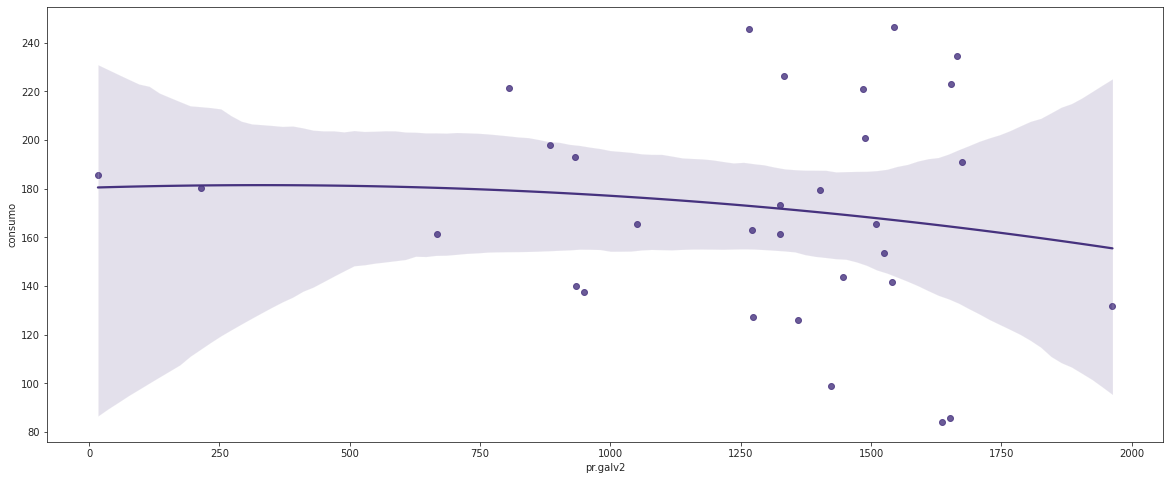

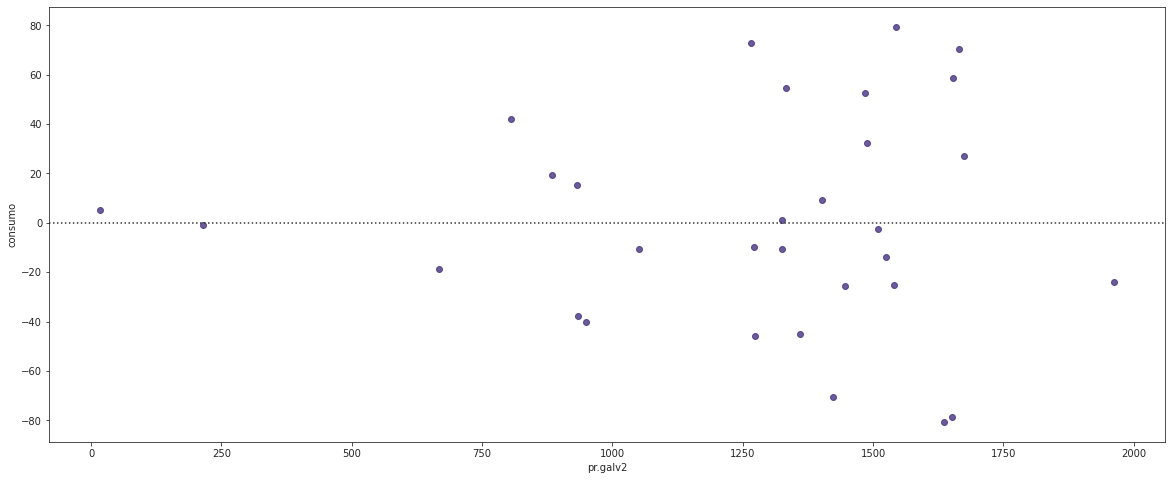

pr.pint - consumo:


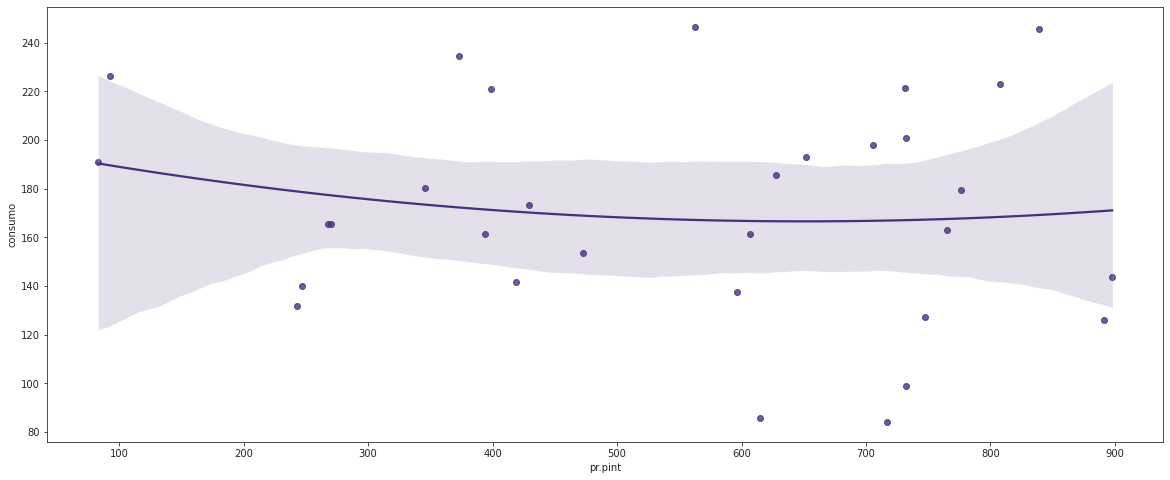

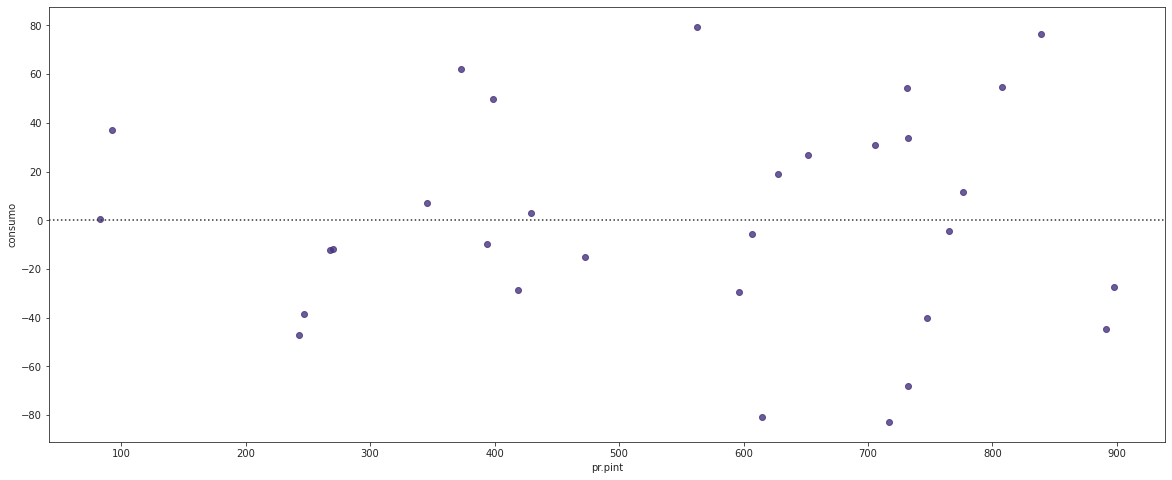

In [5]:
# Regresiones de orden 2
print("----------REGRESIÓN DE ORDEN 2----------")
print("pr.galv1 - consumo:")
sns.regplot(x="pr.galv1", y="consumo", data=a, order=2)
plt.show()
sns.residplot(x="pr.galv1", y="consumo", data=a, order=2)
plt.show()

print("pr.galv2 - consumo:")
sns.regplot(x="pr.galv2", y="consumo", data=b, order=2)
plt.show()
sns.residplot(x="pr.galv2", y="consumo", data=b, order=2)
plt.show()

print("pr.pint - consumo:")
sns.regplot(x="pr.pint", y="consumo", data=c, order=2)
plt.show()
sns.residplot(x="pr.pint", y="consumo", data=c, order=2)
plt.show()

----------REGRESIÓN ROBUSTA----------
pr.galv1 - consumo:


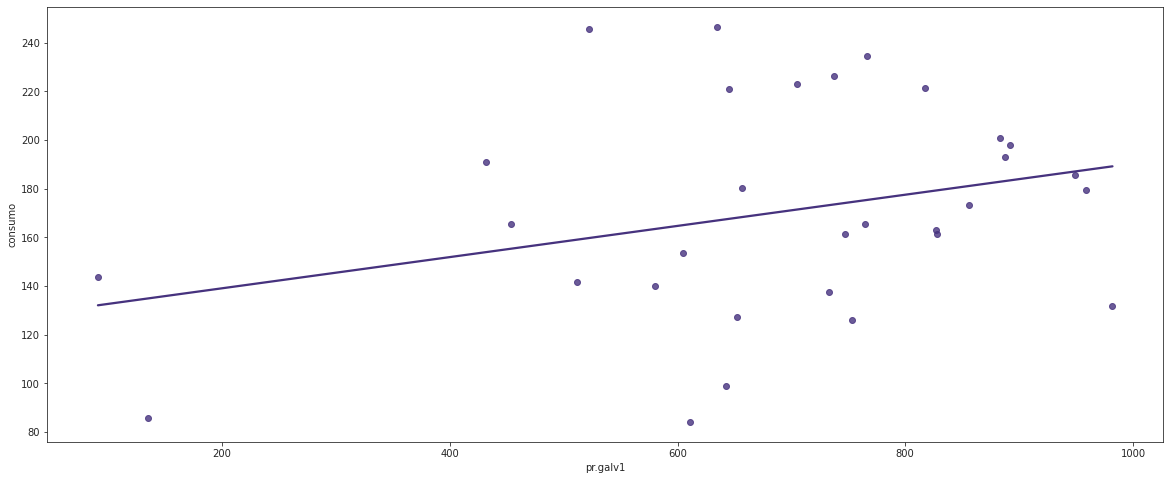

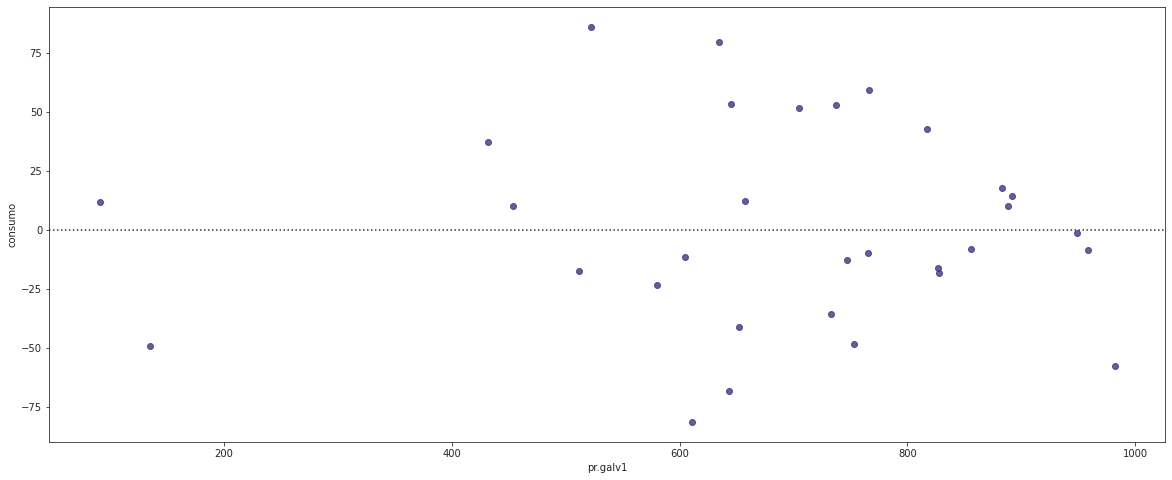

pr.galv2 - consumo:


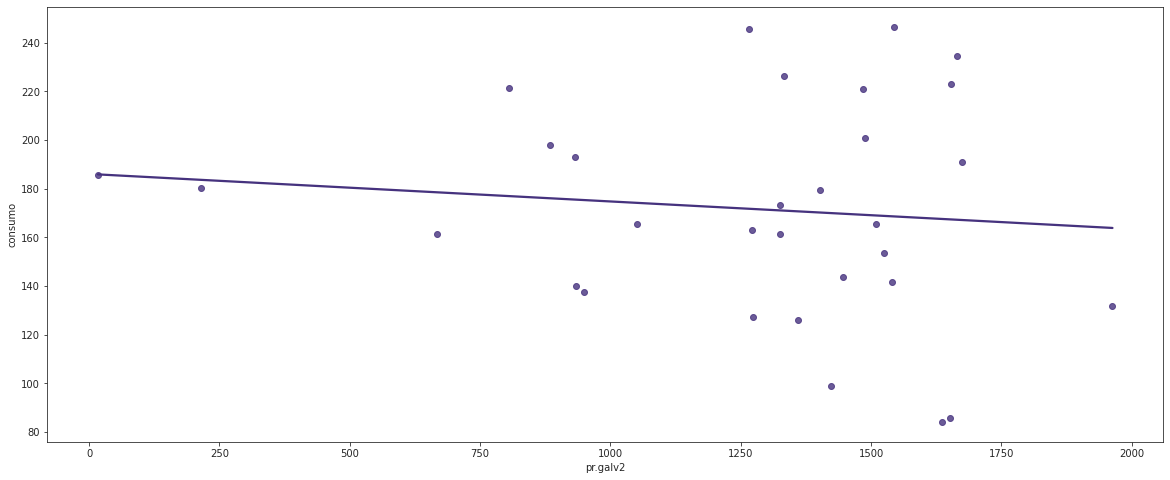

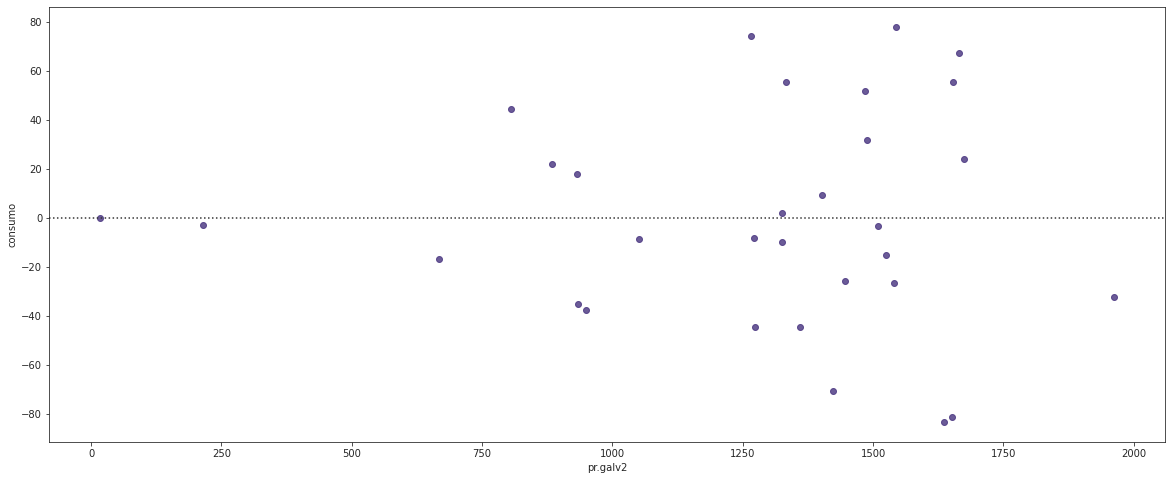

pr.pint - consumo:


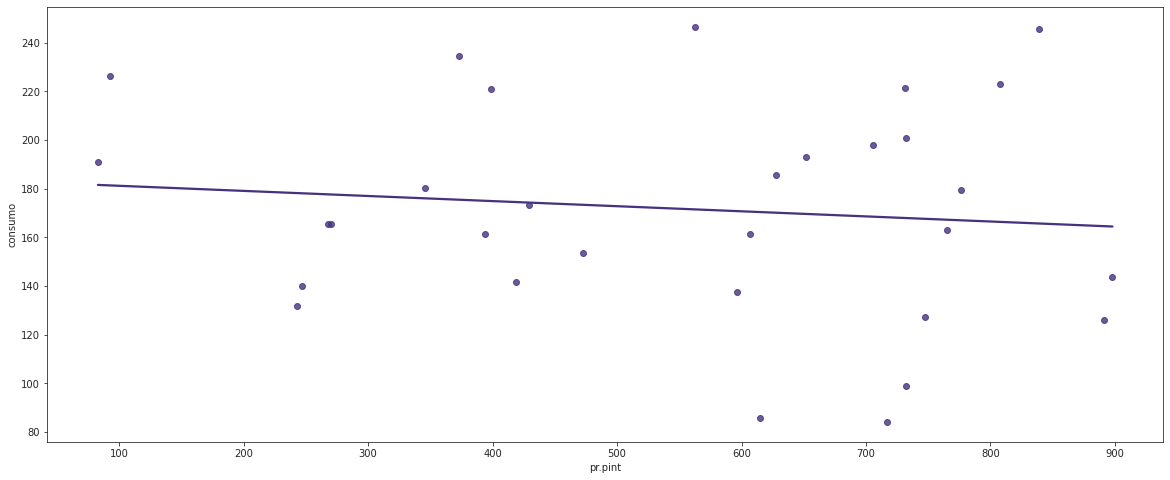

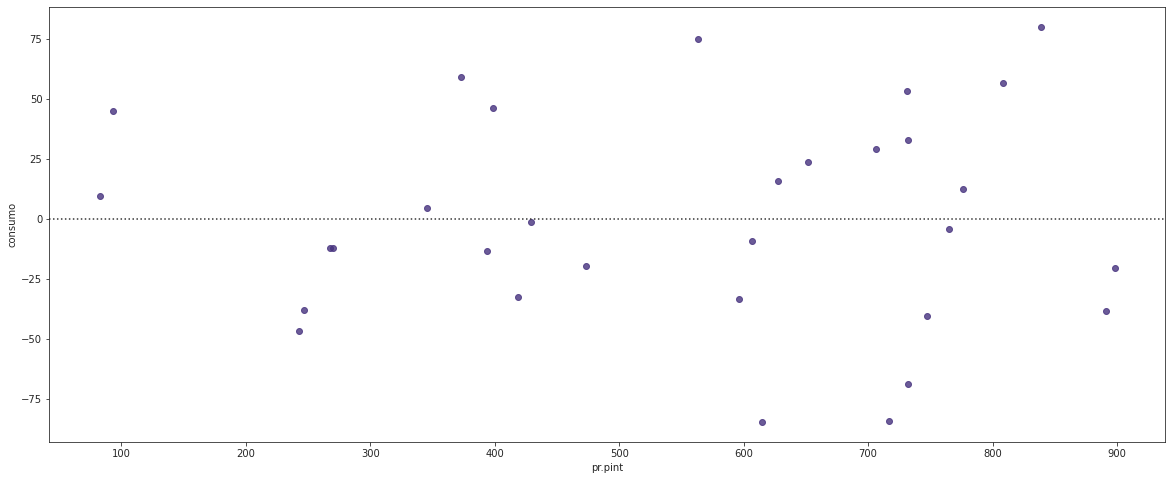

In [7]:
# Regresiones Robusta

print("----------REGRESIÓN ROBUSTA----------")
print("pr.galv1 - consumo:")
sns.regplot(x="pr.galv1", y="consumo", data=a, robust=True, ci=None)
plt.show()
sns.residplot(x="pr.galv1", y="consumo", data=a, robust=True)
plt.show()

print("pr.galv2 - consumo:")
sns.regplot(x="pr.galv2", y="consumo", data=b, robust=True, ci=None)
plt.show()
sns.residplot(x="pr.galv2", y="consumo", data=b, robust=True)
plt.show()

print("pr.pint - consumo:")
sns.regplot(x="pr.pint", y="consumo", data=c, robust=True, ci=None)
plt.show()
sns.residplot(x="pr.pint", y="consumo", data=c, robust=True)
plt.show()


----------REGRESIÓN Localizadas----------
pr.galv1 - consumo:


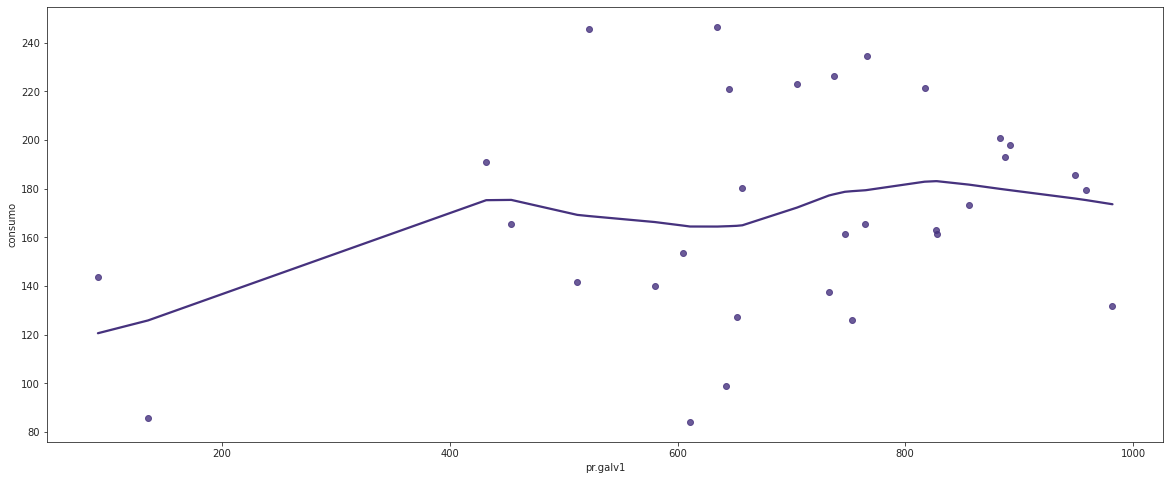

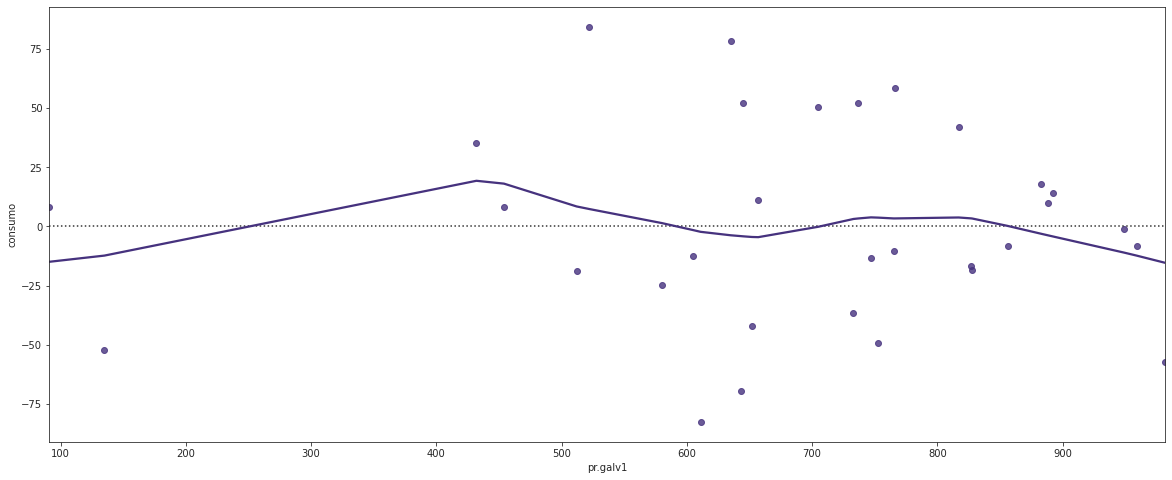

pr.galv2 - consumo:


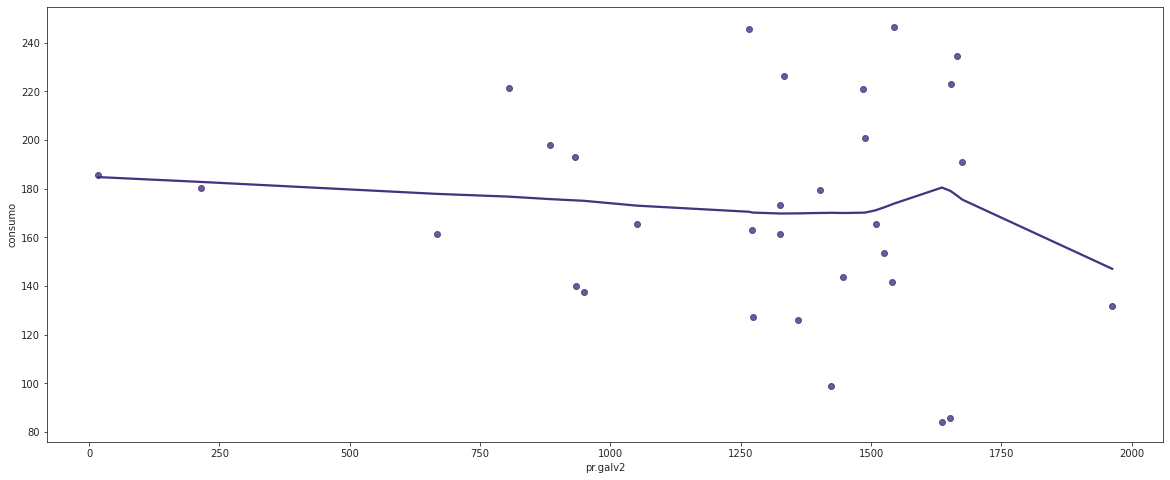

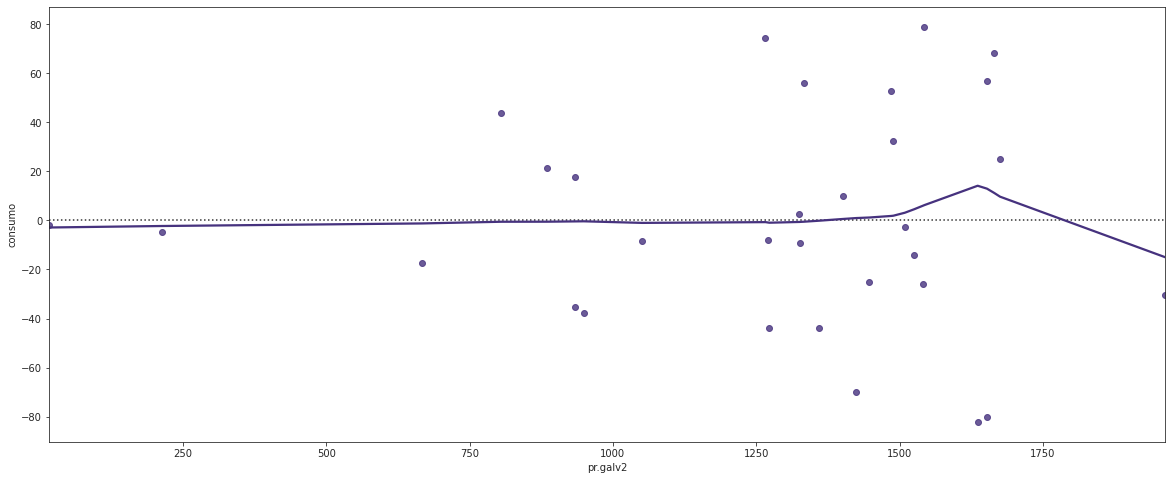

pr.pint - consumo:


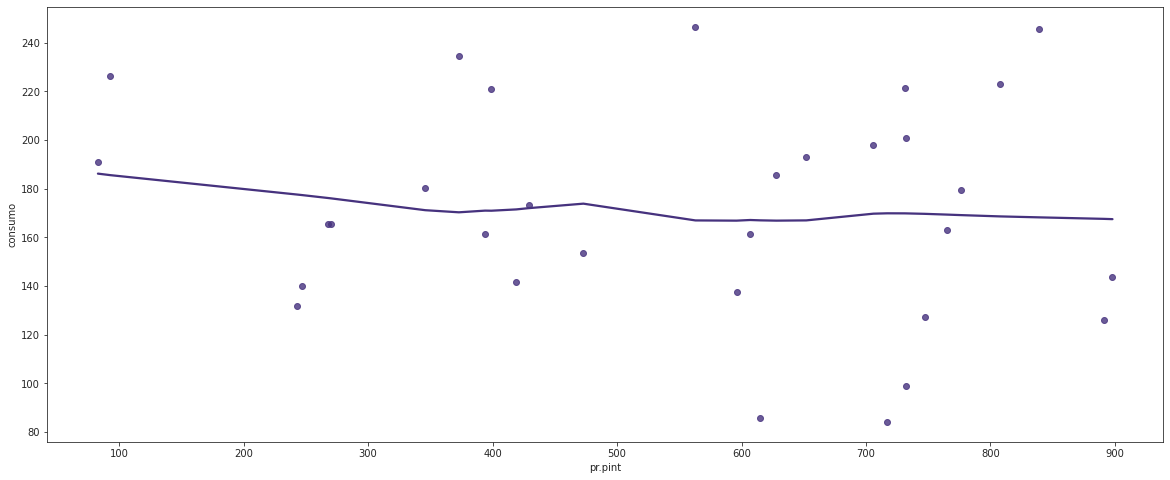

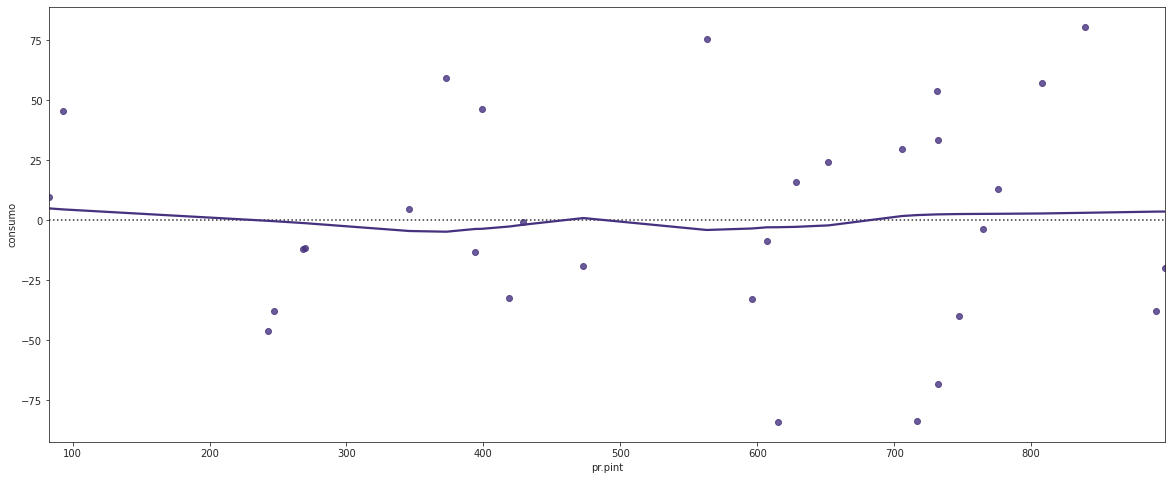

In [11]:
# Regresiones Localizadas

print("----------REGRESIÓN Localizadas----------")
print("pr.galv1 - consumo:")
sns.regplot(x="pr.galv1", y="consumo", data=a, lowess=True)
plt.show()
sns.residplot(x="pr.galv1", y="consumo", data=a, lowess=True)
plt.show()

print("pr.galv2 - consumo:")
sns.regplot(x="pr.galv2", y="consumo", data=b, lowess=True)
plt.show()
sns.residplot(x="pr.galv2", y="consumo", data=b, lowess=True)
plt.show()

print("pr.pint - consumo:")
sns.regplot(x="pr.pint", y="consumo", data=c, lowess=True)
plt.show()
sns.residplot(x="pr.pint", y="consumo", data=c, lowess=True)
plt.show()


### **d.** Genere una variable dependiente a partir del consumo utilizando como punto de corte el tercer cuartil y realice regresiones logísticas (logistic=True).

----------REGRESIÓN Logisticas----------
pr.galv1 - consumo:


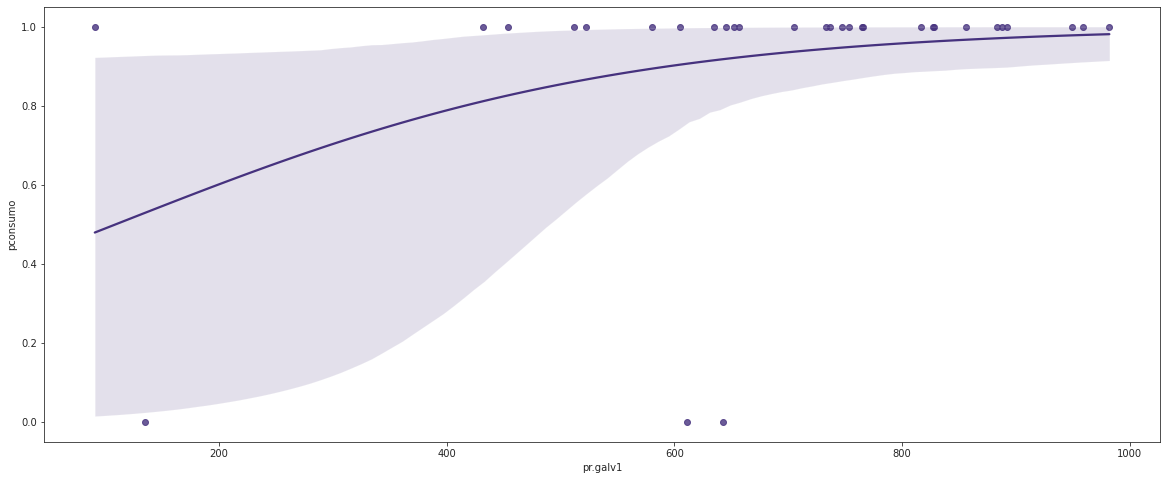

pr.galv1 - consumo:


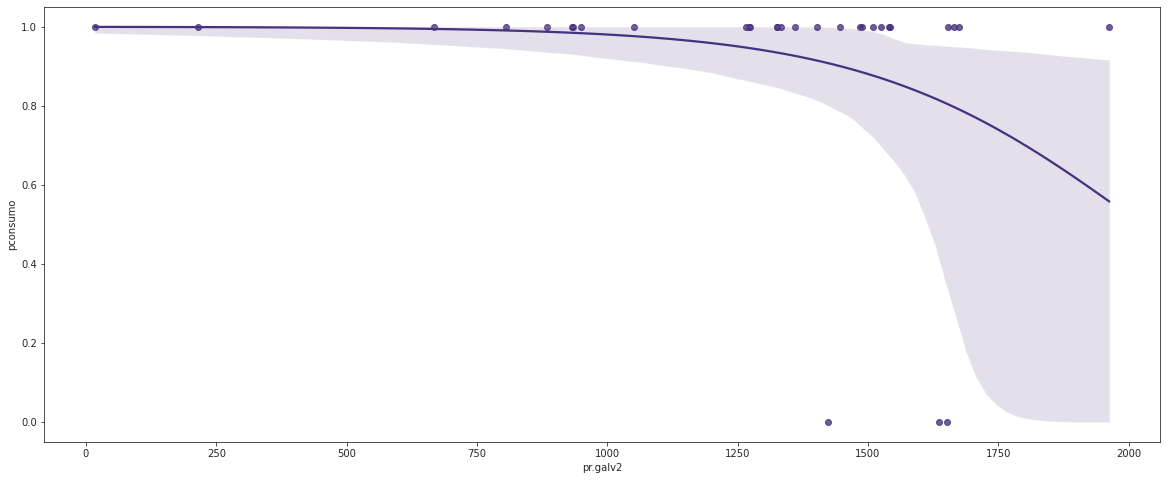

pr.pint - consumo:


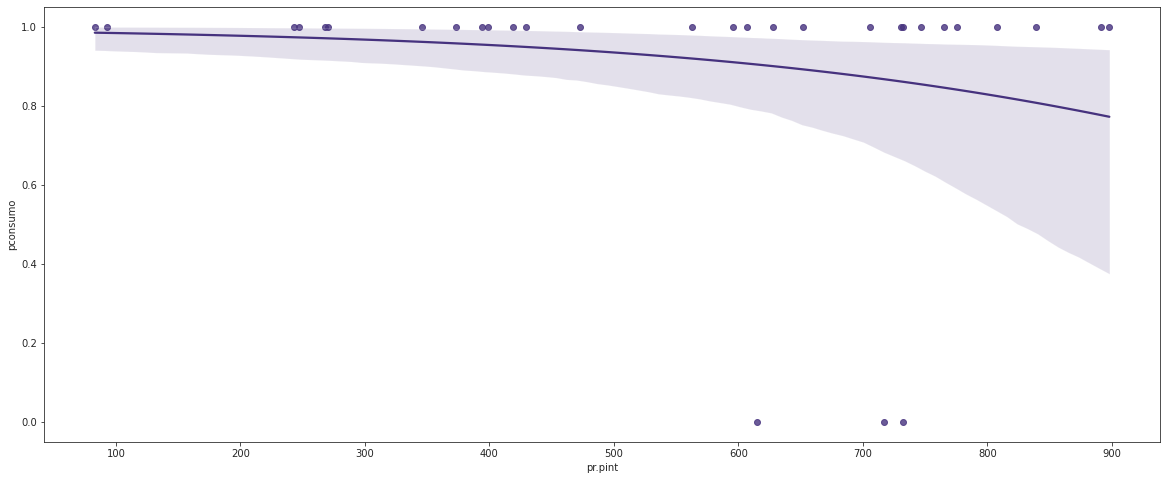

In [41]:
# Regresiones Logisticas
# Creamos nueva variable dicotomica tomando como corte tercer cuartil
rango = data["consumo"].max() - data["consumo"].min()
data["pconsumo"] = (consumo/rango)  > 0.75

a = data.iloc[:,[4,20]]
b = data.iloc[:,[5,20]]
c = data.iloc[:,[6,20]]

print("----------REGRESIÓN Logisticas----------")
print("pr.galv1 - consumo:")
sns.regplot(x="pr.galv1", y="pconsumo", data=a, logistic=True)
plt.show()

print("pr.galv1 - consumo:")
sns.regplot(x="pr.galv2", y="pconsumo", data=b, logistic=True)
plt.show()

print("pr.pint - consumo:")
sns.regplot(x="pr.pint", y="pconsumo", data=c, logistic=True)
plt.show()


## Se observo al menos graficamente que la regresión logistica fue la que mas se ajusto a los datos de consumo energetico contra las producciones de galvanizados y de chapas pintadas.